<a href="https://colab.research.google.com/github/kapetanioyy/datastories_for_emme/blob/main/teliki-ergasia-kapetaniou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Use the correct path after mounting Google Drive
oly1 = pd.read_excel("/content/drive/MyDrive/report.xlsx")
oly2 = pd.read_excel("/content/drive/MyDrive/telikos.xlsx")
oly3 = pd.read_excel("/content/drive/MyDrive/olympiacos.xlsx")

Mounted at /content/drive


In [ ]:
oly=pd.concat([oly1,oly2,oly3])

In [ ]:
len(oly)

7100

In [ ]:
oly.head()

,type,source,title,text,categories,sentiment,Unnamed: 6,date,time,link
0,web,palo.gr,Ολυμπιακός: Ο Ρέτσος έζησε την απόλυτη δικαίωσ...,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:48,https://www.palo.gr/soccer/olympiakos-o-retsos...
1,web,togegonos.gr,Ροντινέι: «Ονειρευόμουν να κερδίσω ένα ευρωπαϊ...,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:37,https://togegonos.gr/2024/05/30/rontinei-oneir...
2,web,kontranews.gr,Ροντινέι: «Ονειρευόμουν να κερδίσω ένα ευρωπαϊ...,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:11,https://www.kontranews.gr/26748/rontinei-oneir...
3,web,editorial.gr,Ροντινέι: «Ονειρευόμουν να κερδίσω ένα ευρωπαϊ...,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:57:35,https://www.editorial.gr/athlitika/269332/ront...
4,web,sportlive.gr,Ο Σπανούλης μιλά για τη μεγάλη νίκη του Ολυμπι...,Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:55:59,https://sportlive.gr/teleutaies-eidisis/o-span...


In [ ]:

oly_cleaned = oly.drop_duplicates(subset=['title'])

In [ ]:
len(oly_cleaned)

5387

In [ ]:
oly_cleaned

,type,source,title,text,categories,sentiment,Unnamed: 6,date,time,link
0,web,palo.gr,Ολυμπιακός: Ο Ρέτσος έζησε την απόλυτη δικαίωσ...,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:48,https://www.palo.gr/soccer/olympiakos-o-retsos...
1,web,togegonos.gr,Ροντινέι: «Ονειρευόμουν να κερδίσω ένα ευρωπαϊ...,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:37,https://togegonos.gr/2024/05/30/rontinei-oneir...
4,web,sportlive.gr,Ο Σπανούλης μιλά για τη μεγάλη νίκη του Ολυμπι...,Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:55:59,https://sportlive.gr/teleutaies-eidisis/o-span...
5,web,thestandard.gr,«Ο Ολυμπιακός κάνει πρόταση στην Πόρτο για τον...,NEWSLETTER\nNEWSLETTER\nNEWSLETTER\nΟ Νταβίντ ...,CONFERENCE LEAUGE,Neutral,NaN,2024-05-30,23:55:24,https://thestandard.gr/athlitika/o-olybiakos-k...
6,web,thestival.gr,Ο γιος του Βαγγέλη Μαρινάκη έκανε τατουάζ την ...,Ο\nΟλυμπιακός\nέγραψε ιστορία το βράδυ της 29η...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:55:00,https://www.thestival.gr/eidiseis/xalara/o-gio...
...,...,...,...,...,...,...,...,...,...,...
1358,web,12vima.gr,Πέθανε ο γνωστός σεφ Γιάννης Γιάχος – Έπαθε αν...,"Θλίψη σκόρπισε στην τοπική κοινωνία της Άρτας,...",CONFERENCE LEAUGE,Positive,NaN,2024-05-31,00:00:00,https://www.12vima.gr/pethane-o-gnostos-sef-gi...
1362,web,magazinomou.gr,Αγγελική Νικολούλη: «Πάντα τέτοια» – Ντυμένη σ...,Φως στο Τούνελ:\nΗ\nΑγγελική\nΝικολούλη\nντύθη...,CONFERENCE LEAUGE,Positive,NaN,2024-05-31,00:00:00,https://magazinomou.gr/%CE%B1%CE%B3%CE%B3%CE%B...
1364,web,nassosblog.gr,Νεκρός ο γνωστός σεφ Γιάννης Γιάχος – Έπαθε αν...,"1 Ιουνίου, 2024, 12:00 πμ\n12.6k\nViews\nΣύμφω...",CONFERENCE LEAUGE,Neutral,NaN,2024-05-31,00:00:00,https://nassosblog.gr/nekros-o-gnostos-sef-gia...
1365,web,sport-fm.gr,Φοβερό ποστ Ροντινέι στα ελληνικά: «Έπρεπε να ...,Ο Ροντινέι έκανε δημοσίευση στα ελληνικά στο I...,CONFERENCE LEAUGE,Neutral,NaN,2024-05-31,00:00:00,https://www.sport-fm.gr/article/podosfairo/Eur...


In [ ]:
oly_clean=oly_cleaned.reset_index()

In [ ]:
oly_clean

,index,type,source,title,text,categories,sentiment,Unnamed: 6,date,time,link
0,0,web,palo.gr,Ολυμπιακός: Ο Ρέτσος έζησε την απόλυτη δικαίωσ...,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:48,https://www.palo.gr/soccer/olympiakos-o-retsos...
1,1,web,togegonos.gr,Ροντινέι: «Ονειρευόμουν να κερδίσω ένα ευρωπαϊ...,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:58:37,https://togegonos.gr/2024/05/30/rontinei-oneir...
2,4,web,sportlive.gr,Ο Σπανούλης μιλά για τη μεγάλη νίκη του Ολυμπι...,Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:55:59,https://sportlive.gr/teleutaies-eidisis/o-span...
3,5,web,thestandard.gr,«Ο Ολυμπιακός κάνει πρόταση στην Πόρτο για τον...,NEWSLETTER\nNEWSLETTER\nNEWSLETTER\nΟ Νταβίντ ...,CONFERENCE LEAUGE,Neutral,NaN,2024-05-30,23:55:24,https://thestandard.gr/athlitika/o-olybiakos-k...
4,6,web,thestival.gr,Ο γιος του Βαγγέλη Μαρινάκη έκανε τατουάζ την ...,Ο\nΟλυμπιακός\nέγραψε ιστορία το βράδυ της 29η...,CONFERENCE LEAUGE,Positive,NaN,2024-05-30,23:55:00,https://www.thestival.gr/eidiseis/xalara/o-gio...
...,...,...,...,...,...,...,...,...,...,...,...
5382,1358,web,12vima.gr,Πέθανε ο γνωστός σεφ Γιάννης Γιάχος – Έπαθε αν...,"Θλίψη σκόρπισε στην τοπική κοινωνία της Άρτας,...",CONFERENCE LEAUGE,Positive,NaN,2024-05-31,00:00:00,https://www.12vima.gr/pethane-o-gnostos-sef-gi...
5383,1362,web,magazinomou.gr,Αγγελική Νικολούλη: «Πάντα τέτοια» – Ντυμένη σ...,Φως στο Τούνελ:\nΗ\nΑγγελική\nΝικολούλη\nντύθη...,CONFERENCE LEAUGE,Positive,NaN,2024-05-31,00:00:00,https://magazinomou.gr/%CE%B1%CE%B3%CE%B3%CE%B...
5384,1364,web,nassosblog.gr,Νεκρός ο γνωστός σεφ Γιάννης Γιάχος – Έπαθε αν...,"1 Ιουνίου, 2024, 12:00 πμ\n12.6k\nViews\nΣύμφω...",CONFERENCE LEAUGE,Neutral,NaN,2024-05-31,00:00:00,https://nassosblog.gr/nekros-o-gnostos-sef-gia...
5385,1365,web,sport-fm.gr,Φοβερό ποστ Ροντινέι στα ελληνικά: «Έπρεπε να ...,Ο Ροντινέι έκανε δημοσίευση στα ελληνικά στο I...,CONFERENCE LEAUGE,Neutral,NaN,2024-05-31,00:00:00,https://www.sport-fm.gr/article/podosfairo/Eur...


In [ ]:
oly_clean_df = oly_clean[['date','text' ]]
oly_clean_df.head()

,date,text
0,2024-05-30,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...
1,2024-05-30,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...
2,2024-05-30,Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...
3,2024-05-30,NEWSLETTER\nNEWSLETTER\nNEWSLETTER\nΟ Νταβίντ ...
4,2024-05-30,Ο\nΟλυμπιακός\nέγραψε ιστορία το βράδυ της 29η...


In [ ]:
oly_clean_df.tail()

,date,text
5382,2024-05-31,"Θλίψη σκόρπισε στην τοπική κοινωνία της Άρτας,..."
5383,2024-05-31,Φως στο Τούνελ:\nΗ\nΑγγελική\nΝικολούλη\nντύθη...
5384,2024-05-31,"1 Ιουνίου, 2024, 12:00 πμ\n12.6k\nViews\nΣύμφω..."
5385,2024-05-31,Ο Ροντινέι έκανε δημοσίευση στα ελληνικά στο I...
5386,2024-05-31,",\n,\n,\n,\nΉλιος\nΓεωμαγνητική καταιγίδα\nΒόρ..."


In [ ]:
oly_clean_df.dtypes

date    object
text    object
dtype: object

In [ ]:
oly_clean_df['datetime'] = pd.to_datetime(oly_clean_df['date'], format='%Y-%m-%d')

<ipython-input-22-0ff12f13b2c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oly_clean_df['datetime'] = pd.to_datetime(oly_clean_df['date'], format='%Y-%m-%d')


In [ ]:
oly_clean_df.dtypes

date                object
text                object
datetime    datetime64[ns]
dtype: object

In [ ]:
oly_clean_df.head(1)

,date,text,datetime
0,2024-05-30,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...,2024-05-30


In [ ]:
short_oly_df = oly_clean_df[['datetime','text' ]]

In [ ]:
short_oly_df.head()

,datetime,text
0,2024-05-30,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...
1,2024-05-30,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...
2,2024-05-30,Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...
3,2024-05-30,NEWSLETTER\nNEWSLETTER\nNEWSLETTER\nΟ Νταβίντ ...
4,2024-05-30,Ο\nΟλυμπιακός\nέγραψε ιστορία το βράδυ της 29η...


In [ ]:
short_oly_df.tail()

,datetime,text
5382,2024-05-31,"Θλίψη σκόρπισε στην τοπική κοινωνία της Άρτας,..."
5383,2024-05-31,Φως στο Τούνελ:\nΗ\nΑγγελική\nΝικολούλη\nντύθη...
5384,2024-05-31,"1 Ιουνίου, 2024, 12:00 πμ\n12.6k\nViews\nΣύμφω..."
5385,2024-05-31,Ο Ροντινέι έκανε δημοσίευση στα ελληνικά στο I...
5386,2024-05-31,",\n,\n,\n,\nΉλιος\nΓεωμαγνητική καταιγίδα\nΒόρ..."


In [ ]:
short_oly_df['year'] = pd.DatetimeIndex(short_oly_df['datetime']).year
short_oly_df['month'] = pd.DatetimeIndex(short_oly_df['datetime']).month
short_oly_df['day'] = pd.DatetimeIndex(short_oly_df['datetime']).day

In [ ]:
short_oly_df.head()

,datetime,text,year,month,day
0,2024-05-30,Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...,2024,5,30
1,2024-05-30,Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...,2024,5,30
2,2024-05-30,Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...,2024,5,30
3,2024-05-30,NEWSLETTER\nNEWSLETTER\nNEWSLETTER\nΟ Νταβίντ ...,2024,5,30
4,2024-05-30,Ο\nΟλυμπιακός\nέγραψε ιστορία το βράδυ της 29η...,2024,5,30


Text(0.5, 1.0, 'Αριθμός άρθρων ανά ημέρα')

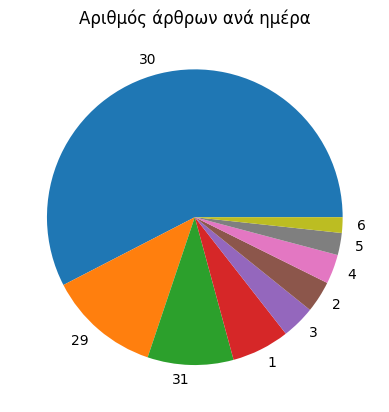

In [ ]:
piechart=short_oly_df['day'].value_counts().plot(kind='pie')
plt.ylabel("")
plt.title("Αριθμός άρθρων ανά ημέρα")

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_oly_df['text']

0       Ο Παναγιώτης Ρέτσος έσβησε τους επιθετικούς τη...
1       Ο Βραζιλιάνος δεξιός μπακ του Ολυμπιακού μίλησ...
2       Το\nΠεριστέρι bwin\nηττήθηκε από τον Ολυμπιακό...
3       NEWSLETTER\nNEWSLETTER\nNEWSLETTER\nΟ Νταβίντ ...
4       Ο\nΟλυμπιακός\nέγραψε ιστορία το βράδυ της 29η...
                              ...                        
5382    Θλίψη σκόρπισε στην τοπική κοινωνία της Άρτας,...
5383    Φως στο Τούνελ:\nΗ\nΑγγελική\nΝικολούλη\nντύθη...
5384    1 Ιουνίου, 2024, 12:00 πμ\n12.6k\nViews\nΣύμφω...
5385    Ο Ροντινέι έκανε δημοσίευση στα ελληνικά στο I...
5386    ,\n,\n,\n,\nΉλιος\nΓεωμαγνητική καταιγίδα\nΒόρ...
Name: text, Length: 5387, dtype: object

In [ ]:
text = short_oly_df['text'].str.cat(sep = ' ')

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text) # το όνομα του κειμένου
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

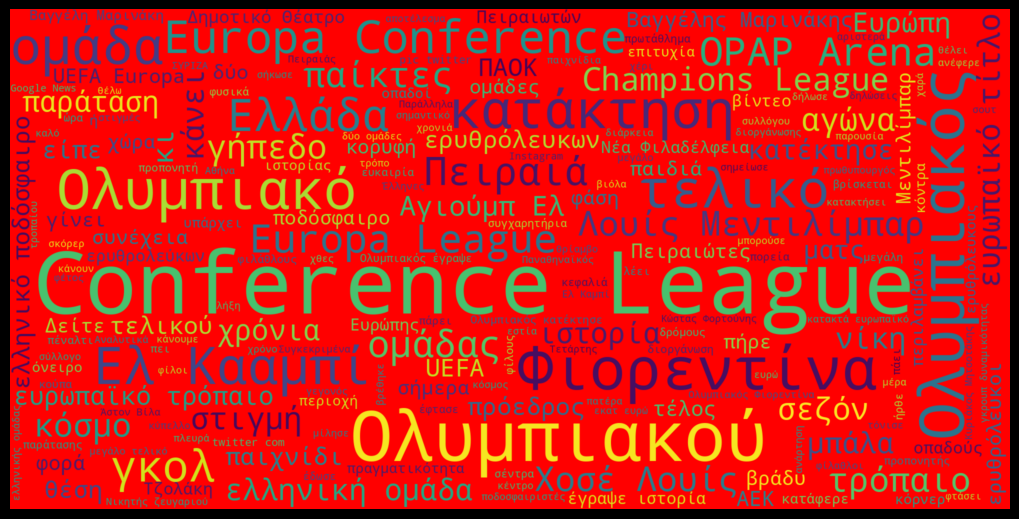

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'red'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc = nlp(short_oly_df['text'][1])

KeyError: 'text'

In [ ]:
for token in doc:
    print(token, token.lemma_)

Ο ο
Βραζιλιάνος Βραζιλιάνος
δεξιός δεξιός
μπακ μπακ
του ο
Ολυμπιακού Ολυμπιακού
μίλησε μίλησε
στην σε ο
ιστοσελίδα ιστοσελίδα
της ο
UEFA UEFA
για για
την ο
κατάκτηση κατάκτηση
του ο
Europa Europa
Conference Conference
League Leagueς
του ο
Ολυμπιακού Ολυμπιακός
κόντρα κόντρα
στην σε ο
Φιορεντίνα Φιορεντίνα
. .

 

« «
Ονειρευόμουν Ονειρευόμουν
να να
κερδίσω κερδίζω
ένα ένας
ευρωπαϊκό ευρωπαϊκός
Κύπελλο Κύπελλος
από από
τότε τότε
που που
έφτασα έφτασα
στην σε ο
Ελλάδα Ελλάδα
. .
Σκεφτόμουν Σκεφτόμουν
ότι ότι
ο ο
Ολυμπιακός Ολυμπιακός
ήταν είμαι
η ο
καλύτερη καλός
ομάδα ομάδα
στην σε ο
Ελλάδα Ελλάδα
και και
ότι ότι
μια ένας
μέρα μέρα
θα θα
ζούσα ζούσας
κάτι κάτι
τέτοιο τέτοιος
. .
Τους Τους
τελευταίους τελευταίος
μήνες μήνας
άρχισα άρχισα
να να
το ο
πιστεύω πιστεύω
ακόμη ακόμα
περισσότερο πολύ
και και
το εγώ
κάναμε κάνω
. .
Αφιερώνω Αφιερώνω
αυτή αυτός
τη ο
νίκη νίκη
στην σε ο
οικογένειά οικογένεια
μου μου
, ,
στους σε ο
οπαδούς οπαδός
του ο
Ολυμπιακού Ολυμπιακού
και και
σε σε
όλο όλος
το

In [ ]:
text

In [ ]:
short_oly_df.loc[:, 'text'] = short_oly_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:

print(short_oly_df['text'].isnull().sum())


short_oly_df['text'] = short_oly_df['text'].fillna('')


matrix = vec.fit_transform(short_oly_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
wordcount_df.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
CountVectorizer(stop_words='english', binary=True)

In [ ]:
emolex_df.head()

In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

In [ ]:
short_oly_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_oly_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_oly_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_oly_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_oly_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_oly_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_oly_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_oly_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_oly_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_oly_df['fear'] = wordcount_df[fear_words].sum(axis=1)


In [ ]:
short_oly_df.head()

In [ ]:

short_oly_df.reset_index(inplace=True)
short_oly_df.set_index('datetime', inplace=True)
short_oly_df.head()

In [ ]:

short_oly_df['text'].resample('D').count().plot(kind='barh')
plt.title("Άρθρα ανά ημέρα")

In [ ]:
short_oly_df['negative'].resample('D').mean().plot()
plt.xlabel("Ημερομηνία")
plt.ylabel("Μέσος όρος αρνητικών λέξεων")
plt.title("Αρνητικότητα ανά ημέρα")

In [ ]:
short_oly_df['positive'].resample('D').mean().plot()
plt.xlabel("Ημερομηνία")
plt.ylabel("Μέσος όρος θετικών λέξεων")
plt.title("Θετικότητα ανά ημέρα")

In [ ]:
ax = short_oly_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_oly_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
plt.legend()
plt.title("Χαρά και θυμός ανά μέρα")
plt.xlabel("Ημερομηνία")
plt.ylabel("Άρθροισμα λέξεων χαράς και θυμού")

In [ ]:
ax = short_oly_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_oly_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
plt.title("Χαρά και θυμός ανά μέρα")
plt.xlabel("Ημερομηνία")
plt.ylabel("Άρθροισμα λέξεων θετικότητας και αρνητικότητας")

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
data = {
    'date': pd.date_range(start='2024-05-29', periods=10, freq='D'),
    'positive': np.random.randint(0, 100, 10),
    'negative': np.random.randint(0, 100, 10)
}

short_oly_df = pd.DataFrame(data)

# Convert the 'date' column to datetime if it is not already
short_oly_df['date'] = pd.to_datetime(short_oly_df['date'])

# Set the 'date' column as the index
short_oly_df.set_index('date', inplace=True)

# Calculate '(-)αρνητικότητα | θετικότητα(+)'
short_oly_df['(-)αρνητικότητα | θετικότητα(+)'] = (
    short_oly_df['positive'] * 100 // short_oly_df[['positive', 'negative']].sum(axis=1) -
    short_oly_df['negative'] * 100 // short_oly_df[['positive', 'negative']].sum(axis=1)
)

# Resample by day and compute the mean
daily_mean = short_oly_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()

# Determine colors based on positivity/negativity
colors = daily_mean.map(lambda x: 'g' if x > 0 else 'r')

# Plot the results using a bar plot
daily_mean.plot(kind='bar', color=colors, figsize=(8, 4))

# Adding labels and title
plt.xlabel('Ημερομηνία')
plt.ylabel('Mέσος όρος συναισθήματος (%)')
plt.title('Ημερήσιος μέσος όρος συναισθήματος (θετικό/αρνητικό)')

# Show the plot
plt.show()

In [ ]:
short_oly_df[(short_oly_df['(-)αρνητικότητα | θετικότητα(+)'] == short_oly_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_oly_df['(-)αρνητικότητα | θετικότητα(+)'] == short_oly_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

In [ ]:
# Access rows using iloc for integer-based indexing
short_oly_df.iloc[[0,5,9], short_oly_df.columns.get_indexer(['url','title', 'text'])]

In [ ]:
# Access rows using iloc for integer-based indexing
short_oly_df.iloc[[13,4968,4990], short_oly_df.columns.get_indexer(['url','title', 'text'])]